In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('311_Service_Requests_from_2015.csv', 
                 dtype={"Incident Zip": str, "Landmark": str, "Vehicle Type": str, "Taxi Company Borough": str,
                       "Taxi Pick Up Location": str, "Bridge Highway Name":str, "Bridge Highway Direction":str,
                       "Road Ramp": str, "Bridge Highway Segment": str,"Garage Lot Name":str, "Ferry Direction": str,
                       "Ferry Terminal Name": str })
df.columns = [c.replace(' ', '_') for c in df.columns]

In [3]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df = df[np.isfinite(df['Latitude'])]
df = df[np.isfinite(df['Longitude'])]
df = df[pd.notnull(df['Complaint_Type'])]
df.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,Street_Name,Cross_Street_1,Cross_Street_2,Intersection_Street_1,Intersection_Street_2,Address_Type,City,Landmark,Facility_Type,Status,Due_Date,Resolution_Description,Resolution_Action_Updated_Date,Community_Board,Borough,X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane),Park_Facility_Name,Park_Borough,School_Name,School_Number,School_Region,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,School_or_Citywide_Complaint,Vehicle_Type,Taxi_Company_Borough,Taxi_Pick_Up_Location,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,203 STREET,27 AVENUE,BEND,NaN,NaN,ADDRESS,BAYSIDE,NaN,NaN,Closed,07/23/2015 03:33:35 PM,The Department of Consumer Affairs mailed you ...,07/22/2015 01:07:20 AM,11 QUEENS,QUEENS,1042903.0,221169.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,CENTRAL PARK SOUTH,7 AVENUE,COLUMBUS CIRCLE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,07/03/2015 09:26:29 PM,The Police Department responded to the complai...,07/03/2015 02:08:20 PM,05 MANHATTAN,MANHATTAN,989943.0,218724.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,GRAND AVENUE,WEST TREMONT AVENUE,WEST BURNSIDE AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,11/09/2015 11:55:09 AM,The Police Department responded to the complai...,11/09/2015 08:08:57 AM,05 BRONX,BRONX,1008980.0,249941.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)"
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,NORTHERN BOULEVARD,84 STREET,85 STREET,NaN,NaN,ADDRESS,JACKSON HEIGHTS,NaN,Precinct,Closed,07/03/2015 10:18:32 AM,The Police Department responded to the complai...,07/03/2015 07:54:48 AM,03 QUEENS,QUEENS,1016592.0,214647.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,BERGEN STREET,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,07/04/2015 08:03:27 AM,The Police Department responded and upon arriv...,07/04/2015 03:33:09 AM,08 BROOKLYN,BROOKLYN,997767.0,185629.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)"


In [4]:
print df.shape

(2047477, 53)


In [5]:
df['City'] = (df['City'].str.replace(r'NEW YORK', 'Manhattan'))
df['City'] = df['City'].str.upper()

In [6]:
com_type = df.groupby('Complaint_Type').count()
com_type = com_type[com_type.Unique_Key > 100000]
most_comp_types = com_type.index.tolist()
most_comp = (df.loc[df['Complaint_Type'].isin(most_comp_types)])


city_type = most_comp.groupby('City').count()
city_comp = city_type[city_type.Complaint_Type > 5000]
city_name = city_comp.index.tolist()
most_comp_city = (most_comp.loc[most_comp['City'].isin(city_name)])
most_comp_city = most_comp_city[['Complaint_Type', 'City']]


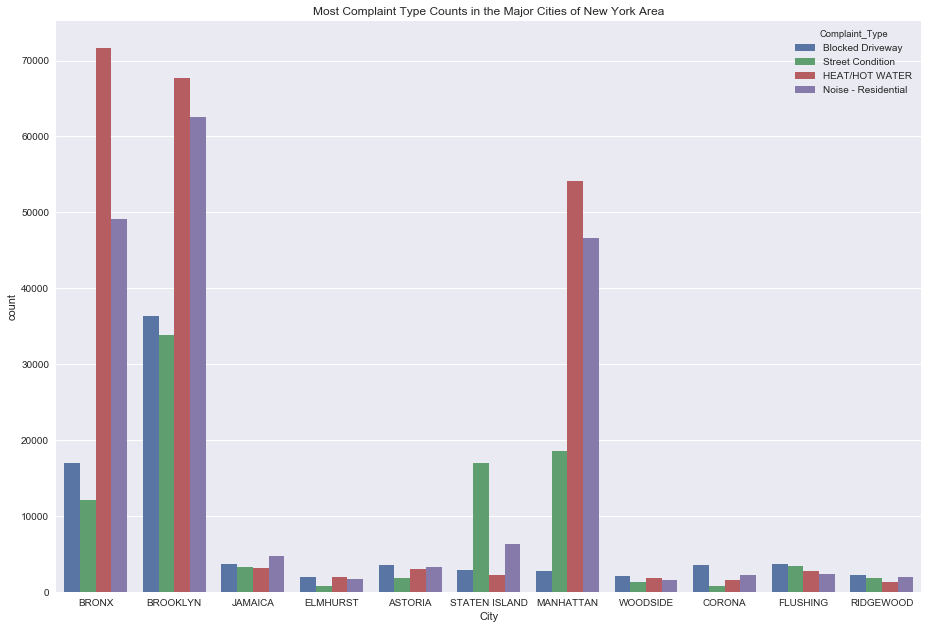

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 10.5)

ax = sns.countplot(x="City", hue = "Complaint_Type" ,data=most_comp_city)
# plt.xlabel('Smarts')
# plt.ylabel('Probability')
plt.title('Most Complaint Type Counts in the Major Cities of New York Area')

plt.savefig('Most_Comp_City.png', format='png', dpi=600)
plt.show()

In [8]:
pd.options.display.max_colwidth = 100
re = df.groupby('Resolution_Description').count()
re = re[re.Unique_Key > 90000]
most_action_list = re.index.tolist()
print most_action_list
most_action = (df.loc[df['Resolution_Description'].isin(most_action_list)])

city_type = most_action.groupby('City').count()
city_comp = city_type[city_type.Resolution_Description > 8000]
city_name = city_comp.index.tolist()
most_res_city = (most_action.loc[most_action['City'].isin(city_name)])
most_res_city = most_res_city[['Resolution_Description', 'City']]

['The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.', 'The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.', 'The Police Department responded to the complaint and took action to fix the condition.', 'The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.', 'The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.']


In [9]:
most_res_city['Resolution_Description'] = (most_res_city['Resolution_Description'].str.replace(r'The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.', 'Inspected, no violation, case closed'))
most_res_city['Resolution_Description'] = (most_res_city['Resolution_Description'].str.replace(r'The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.', 'Inspected, violation issued'))
most_res_city['Resolution_Description'] = (most_res_city['Resolution_Description'].str.replace(r'The Police Department responded to the complaint and took action to fix the condition.', 'Fixed'))
most_res_city['Resolution_Description'] = (most_res_city['Resolution_Description'].str.replace(r'The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.', 'Unresolved'))
most_res_city['Resolution_Description'] = (most_res_city['Resolution_Description'].str.replace(r'The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.', 'Duplicate'))

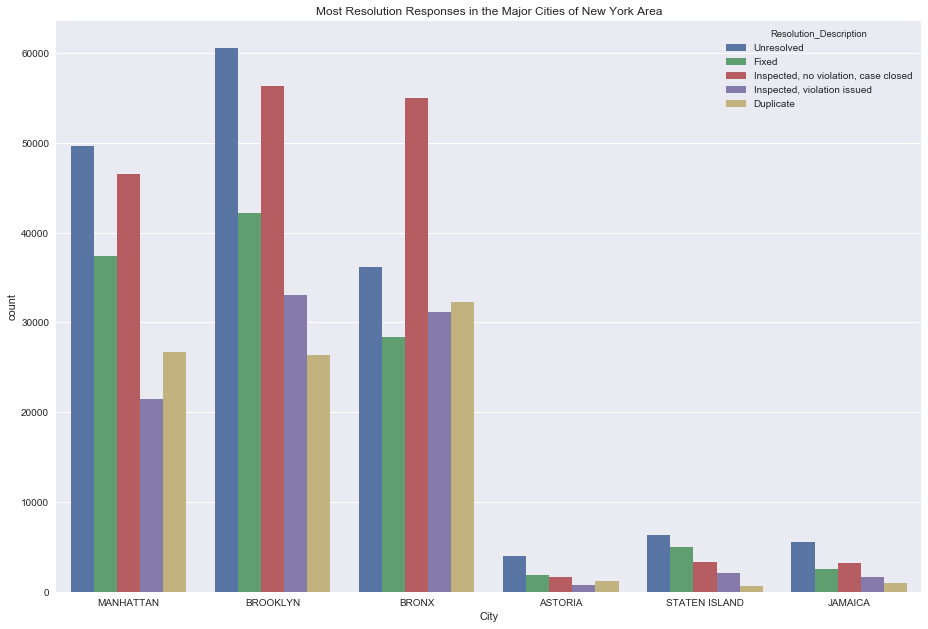

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 10.5)

ax = sns.countplot(x="City", hue = "Resolution_Description" ,data=most_res_city)
# plt.xlabel('Smarts')
# plt.ylabel('Probability')
plt.title('Most Resolution Responses in the Major Cities of New York Area')

plt.savefig('Most_Resolution_City.png', format='png', dpi=600)
plt.show()

In [11]:
traff_comp_name = ['Traffic' ,'Traffic Signal Condition','Street Light Condition' ]
traff_comp = (df.loc[df['Complaint_Type'].isin(traff_comp_name)])
traff_comp = traff_comp[['Complaint_Type','Latitude','Longitude','City']]

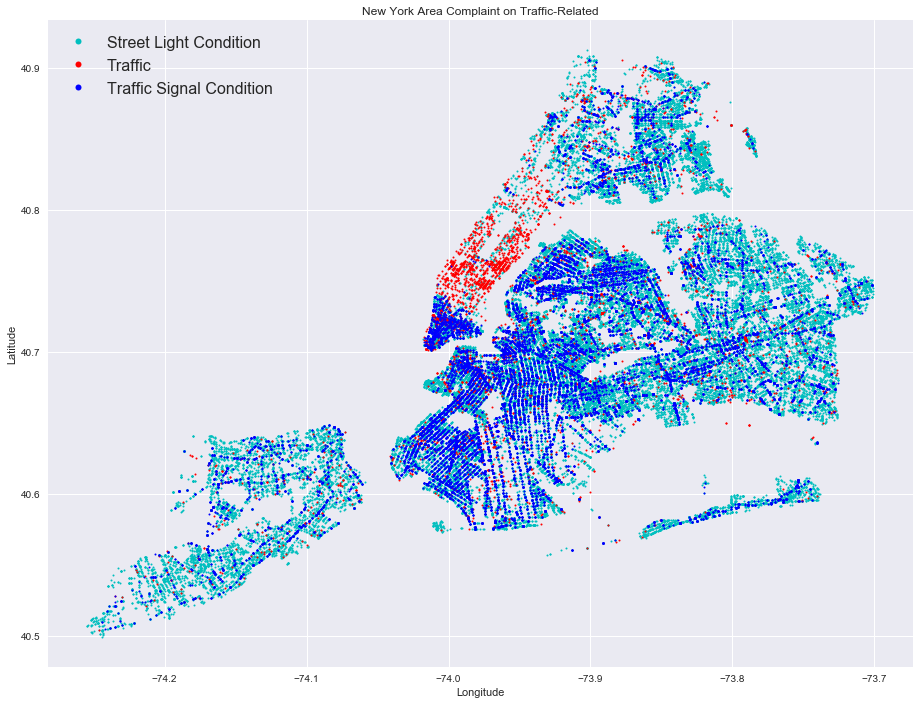

In [12]:
groups = traff_comp.groupby('Complaint_Type')
plt_c = ['c', 'r', 'b']

# Plot
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 15.5)
# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for (name, group), color in zip(groups, cycle(plt_c)):
    ax.plot(group.Longitude, group.Latitude, color = color , marker='o', linestyle='', ms=2, label=name)
ax.legend(loc=2, prop={'size': 16}, markerscale=3.)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York Area Complaint on Traffic-Related')

plt.savefig('Traffic-Related Complaint.png', format='png', dpi= 600)
plt.show()

In [13]:
Col = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', dtype={"BOROUGH":str})

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
Col = Col[np.isfinite(Col['LATITUDE'])]
Col = Col[np.isfinite(Col['LONGITUDE'])]
Col['Year'] = pd.to_datetime(Col['DATE'], format = '%d/%M/%Y').dt.year

Col['Hour'] = pd.to_datetime(Col['TIME'], format='%H:%M').dt.hour
Col = Col[np.isfinite(Col['Hour'])]
Col = Col[Col.Year == 2015]
Col = Col[Col.Hour > 12]
Col = Col[Col.Hour < 20]
Col = Col[Col.LONGITUDE < -70]
Col = Col[Col.LONGITUDE > -80 ]

rush_df = Col[['Year','Hour','LATITUDE','LONGITUDE']]
rush_df.head()

,Year,Hour,LATITUDE,LONGITUDE
343374,2015,19,40.888931,-73.865783
345340,2015,19,40.607920,-74.138911
346008,2015,16,40.761205,-73.730935
349807,2015,13,40.828225,-73.908606
349808,2015,13,40.620914,-73.975296


In [15]:
traff_comp_name = ['Traffic','Street Light Condition' ]
traff_comp = (df.loc[df['Complaint_Type'].isin(traff_comp_name)])
traff_comp = traff_comp[['Complaint_Type','Latitude','Longitude','City']]

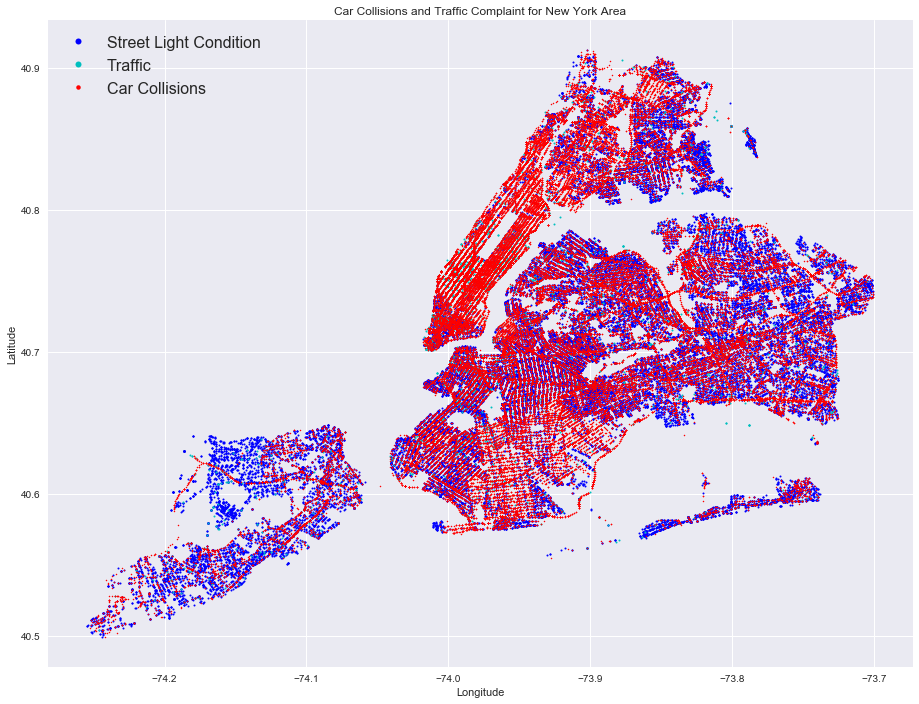

In [16]:
groups = traff_comp.groupby('Complaint_Type')
plt_c = ['b', 'c']

# Plot
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 15.5)
# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for (name, group), color in zip(groups, cycle(plt_c)):
    ax.plot(group.Longitude, group.Latitude, color = color , marker='o', linestyle='', ms=2, label=name)
ax.plot(rush_df.LONGITUDE.values, rush_df.LATITUDE.values, color = 'r', marker='o',linestyle='', 
        ms=1.5, label = 'Car Collisions')
ax.legend(loc=2, prop={'size': 16}, markerscale=3.)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Car Collisions and Traffic Complaint for New York Area')

# plt.savefig('Collision and Traffic Complaint.png', format='png', dpi= 600)
plt.show()